# The Challenge

You have been engaged as a Data Science consultant by a coal terminal. They would like you to investigate one of their heavy machines - RL1.  

You have been supplied one month worth of data for all of their machines. The
dataset shows what percentage of capacity for each machine was idle (unused) in any given hour. You are required to deliver an R list with the following components:  

Character: Machine name  
Vector: (min, mean, max) utilisation for the month (excluding unknown hours)  
Logical: Has utilisation ever fallen below 90%? TRUE / FALSE  
Vector: All hours where utilisation is unknown (NA’s)  
Dataframe: For this machine  
Plot: For all machines  

# Import data into R

In [36]:
getwd()

[1] "C:/Users/jeson/Udemy/R/Projects/Machine Utilization"

In [37]:
util <- read.csv("Machine-Utilization.csv")

In [38]:
head(util, 12)

Timestamp,Machine,Percent.Idle
01/09/2016 00:00,RL1,NA
01/09/2016 01:00,RL1,NA
01/09/2016 02:00,RL1,NA
01/09/2016 03:00,RL1,NA
01/09/2016 04:00,RL1,NA
01/09/2016 05:00,RL1,NA
01/09/2016 06:00,RL1,NA
01/09/2016 07:00,RL1,0.01994048
01/09/2016 08:00,RL1,0.01997024
01/09/2016 09:00,RL1,0.02119048


In [39]:
str(util)

'data.frame':	3600 obs. of  3 variables:
 $ Timestamp   : Factor w/ 720 levels "01/09/2016 00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Machine     : Factor w/ 5 levels "RL1","RL2","SR1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Percent.Idle: num  NA NA NA NA NA ...


In [40]:
summary(util)

            Timestamp    Machine     Percent.Idle   
 01/09/2016 00:00:   5   RL1 :720   Min.   :0.0000  
 01/09/2016 01:00:   5   RL2 :720   1st Qu.:0.0262  
 01/09/2016 02:00:   5   SR1 :720   Median :0.0410  
 01/09/2016 03:00:   5   SR4A:720   Mean   :0.0431  
 01/09/2016 04:00:   5   SR6 :720   3rd Qu.:0.0576  
 01/09/2016 05:00:   5              Max.   :0.1508  
 (Other)         :3570              NA's   :361     

From the summary, we know that each machine has 720 records, meaning each hour of the month has been recorded.

Analyzing the data will be easier if we pay attention to how long the machine has been in use, as opposed to paying attention to how long the machine has been idle.

In [41]:
# Derive utilization column
util$Utilization <- 1-util$Percent.Idle

In [42]:
head(util, 12)

Timestamp,Machine,Percent.Idle,Utilization
01/09/2016 00:00,RL1,NA,NA
01/09/2016 01:00,RL1,NA,NA
01/09/2016 02:00,RL1,NA,NA
01/09/2016 03:00,RL1,NA,NA
01/09/2016 04:00,RL1,NA,NA
01/09/2016 05:00,RL1,NA,NA
01/09/2016 06:00,RL1,NA,NA
01/09/2016 07:00,RL1,0.01994048,0.9800595
01/09/2016 08:00,RL1,0.01997024,0.9800298
01/09/2016 09:00,RL1,0.02119048,0.9788095


# Handling Date-Times in R

In [43]:
tail(util)  # To see the format of the date-time

,Timestamp,Machine,Percent.Idle,Utilization
3595,30/09/2016 18:00,SR6,0.03485507,0.9651449
3596,30/09/2016 19:00,SR6,0.04605073,0.9539493
3597,30/09/2016 20:00,SR6,0.04427536,0.9557246
3598,30/09/2016 21:00,SR6,0.04141304,0.9585870
3599,30/09/2016 22:00,SR6,0.06750000,0.9325000
3600,30/09/2016 23:00,SR6,0.05355073,0.9464493


We can see that the format of the Timestamp is day/month/year.

Suppose we didn't have this info and the date format was ambiguous. We would use the universal format called POSIXct. It stores time as the number of seconds that passed since the start of the year of 1973 until the current time in the UTC timezone.

In [44]:
# Universal Date-Time in R.
util$PosixTime <- as.POSIXct(util$Timestamp, format="%d/%m/%Y %H:%M")

In [45]:
head(util,12)

Timestamp,Machine,Percent.Idle,Utilization,PosixTime
01/09/2016 00:00,RL1,NA,NA,2016-09-01 00:00:00
01/09/2016 01:00,RL1,NA,NA,2016-09-01 01:00:00
01/09/2016 02:00,RL1,NA,NA,2016-09-01 02:00:00
01/09/2016 03:00,RL1,NA,NA,2016-09-01 03:00:00
01/09/2016 04:00,RL1,NA,NA,2016-09-01 04:00:00
01/09/2016 05:00,RL1,NA,NA,2016-09-01 05:00:00
01/09/2016 06:00,RL1,NA,NA,2016-09-01 06:00:00
01/09/2016 07:00,RL1,0.01994048,0.9800595,2016-09-01 07:00:00
01/09/2016 08:00,RL1,0.01997024,0.9800298,2016-09-01 08:00:00
01/09/2016 09:00,RL1,0.02119048,0.9788095,2016-09-01 09:00:00


In [46]:
summary(util)

            Timestamp    Machine     Percent.Idle     Utilization    
 01/09/2016 00:00:   5   RL1 :720   Min.   :0.0000   Min.   :0.8492  
 01/09/2016 01:00:   5   RL2 :720   1st Qu.:0.0262   1st Qu.:0.9424  
 01/09/2016 02:00:   5   SR1 :720   Median :0.0410   Median :0.9590  
 01/09/2016 03:00:   5   SR4A:720   Mean   :0.0431   Mean   :0.9569  
 01/09/2016 04:00:   5   SR6 :720   3rd Qu.:0.0576   3rd Qu.:0.9738  
 01/09/2016 05:00:   5              Max.   :0.1508   Max.   :1.0000  
 (Other)         :3570              NA's   :361      NA's   :361     
   PosixTime                  
 Min.   :2016-09-01 00:00:00  
 1st Qu.:2016-09-08 11:45:00  
 Median :2016-09-15 23:30:00  
 Mean   :2016-09-15 23:30:00  
 3rd Qu.:2016-09-23 11:15:00  
 Max.   :2016-09-30 23:00:00  
                              

Since we no longer need the original Timestamp column, we will replace it with our new PosixTime.

In [47]:
# Tip: How to rearrange columns in a df:
util$Timestamp <- NULL
head(util,12)

Machine,Percent.Idle,Utilization,PosixTime
RL1,NA,NA,2016-09-01 00:00:00
RL1,NA,NA,2016-09-01 01:00:00
RL1,NA,NA,2016-09-01 02:00:00
RL1,NA,NA,2016-09-01 03:00:00
RL1,NA,NA,2016-09-01 04:00:00
RL1,NA,NA,2016-09-01 05:00:00
RL1,NA,NA,2016-09-01 06:00:00
RL1,0.01994048,0.9800595,2016-09-01 07:00:00
RL1,0.01997024,0.9800298,2016-09-01 08:00:00
RL1,0.02119048,0.9788095,2016-09-01 09:00:00


In [48]:
util <- util[,c(4,1,2,3)]

In [49]:
head(util,12)

PosixTime,Machine,Percent.Idle,Utilization
2016-09-01 00:00:00,RL1,NA,NA
2016-09-01 01:00:00,RL1,NA,NA
2016-09-01 02:00:00,RL1,NA,NA
2016-09-01 03:00:00,RL1,NA,NA
2016-09-01 04:00:00,RL1,NA,NA
2016-09-01 05:00:00,RL1,NA,NA
2016-09-01 06:00:00,RL1,NA,NA
2016-09-01 07:00:00,RL1,0.01994048,0.9800595
2016-09-01 08:00:00,RL1,0.01997024,0.9800298
2016-09-01 09:00:00,RL1,0.02119048,0.9788095


# What is a list?

In [50]:
# Like a vector with multiple types
summary(util)

   PosixTime                   Machine     Percent.Idle     Utilization    
 Min.   :2016-09-01 00:00:00   RL1 :720   Min.   :0.0000   Min.   :0.8492  
 1st Qu.:2016-09-08 11:45:00   RL2 :720   1st Qu.:0.0262   1st Qu.:0.9424  
 Median :2016-09-15 23:30:00   SR1 :720   Median :0.0410   Median :0.9590  
 Mean   :2016-09-15 23:30:00   SR4A:720   Mean   :0.0431   Mean   :0.9569  
 3rd Qu.:2016-09-23 11:15:00   SR6 :720   3rd Qu.:0.0576   3rd Qu.:0.9738  
 Max.   :2016-09-30 23:00:00              Max.   :0.1508   Max.   :1.0000  
                                          NA's   :361      NA's   :361     

In [51]:
RL1 <- util[util$Machine=="RL1",]

In [52]:
summary(RL1)

   PosixTime                   Machine     Percent.Idle      Utilization    
 Min.   :2016-09-01 00:00:00   RL1 :720   Min.   :0.00500   Min.   :0.8492  
 1st Qu.:2016-09-08 11:45:00   RL2 :  0   1st Qu.:0.03208   1st Qu.:0.9403  
 Median :2016-09-15 23:30:00   SR1 :  0   Median :0.04613   Median :0.9539  
 Mean   :2016-09-15 23:30:00   SR4A:  0   Mean   :0.04830   Mean   :0.9517  
 3rd Qu.:2016-09-23 11:15:00   SR6 :  0   3rd Qu.:0.05967   3rd Qu.:0.9679  
 Max.   :2016-09-30 23:00:00              Max.   :0.15077   Max.   :0.9950  
                                          NA's   :7         NA's   :7       

Since RL1 has brought over the legacy factorization, we must refactor the Machine column to get rid of RL2, SR1, etc.

In [53]:
RL1$Machine <- factor(RL1$Machine)

In [54]:
summary(RL1)

   PosixTime                   Machine    Percent.Idle      Utilization    
 Min.   :2016-09-01 00:00:00   RL1:720   Min.   :0.00500   Min.   :0.8492  
 1st Qu.:2016-09-08 11:45:00             1st Qu.:0.03208   1st Qu.:0.9403  
 Median :2016-09-15 23:30:00             Median :0.04613   Median :0.9539  
 Mean   :2016-09-15 23:30:00             Mean   :0.04830   Mean   :0.9517  
 3rd Qu.:2016-09-23 11:15:00             3rd Qu.:0.05967   3rd Qu.:0.9679  
 Max.   :2016-09-30 23:00:00             Max.   :0.15077   Max.   :0.9950  
                                         NA's   :7         NA's   :7       

# Deliverables: Name, Machine Stats and Under 90% Utilization

In [55]:
# Construct list:
util_stats_rl1 <- c(min(RL1$Utilization, na.rm=1), mean(RL1$Utilization, na.rm=1), max(RL1$Utilization, na.rm=1))
util_stats_rl1

util_under_90_flag <- length(which(RL1$Utilization < 0.90)) > 0
util_under_90_flag



[1] 0.8492262 0.9516976 0.9950000

[1] TRUE

In [56]:
list_rl1 <- list(Machine="RL1", Stats=util_stats_rl1, LowThreshold=util_under_90_flag)
list_rl1

$Machine
[1] "RL1"

$Stats
[1] 0.8492262 0.9516976 0.9950000

$LowThreshold
[1] TRUE

# Deliverables: All hours where utilization is unknown (null), and Machine DataFrame

In [57]:
# Another way to add a component - via the $
# Vector: All hours where utilization is unknown (NA)
RL1[is.na(RL1$Utilization), "PosixTime"]

[1] "2016-09-01 00:00:00 EDT" "2016-09-01 01:00:00 EDT"
[3] "2016-09-01 02:00:00 EDT" "2016-09-01 03:00:00 EDT"
[5] "2016-09-01 04:00:00 EDT" "2016-09-01 05:00:00 EDT"
[7] "2016-09-01 06:00:00 EDT"

In [58]:
list_rl1$UnknownHours = RL1[is.na(RL1$Utilization),"PosixTime"]

In [59]:
list_rl1

$Machine
[1] "RL1"

$Stats
[1] 0.8492262 0.9516976 0.9950000

$LowThreshold
[1] TRUE

$UnknownHours
[1] "2016-09-01 00:00:00 EDT" "2016-09-01 01:00:00 EDT"
[3] "2016-09-01 02:00:00 EDT" "2016-09-01 03:00:00 EDT"
[5] "2016-09-01 04:00:00 EDT" "2016-09-01 05:00:00 EDT"
[7] "2016-09-01 06:00:00 EDT"


In [60]:
# Add another component:
# Dataframe: For this machine
list_rl1$Data = RL1
summary(list_rl1)

             Length Class      Mode     
Machine      1      -none-     character
Stats        3      -none-     numeric  
LowThreshold 1      -none-     logical  
UnknownHours 7      POSIXct    numeric  
Data         4      data.frame list     

In [61]:
str(list_rl1)

List of 5
 $ Machine     : chr "RL1"
 $ Stats       : num [1:3] 0.849 0.952 0.995
 $ LowThreshold: logi TRUE
 $ UnknownHours: POSIXct[1:7], format: "2016-09-01 00:00:00" "2016-09-01 01:00:00" ...
 $ Data        :'data.frame':	720 obs. of  4 variables:
  ..$ PosixTime   : POSIXct[1:720], format: "2016-09-01 00:00:00" "2016-09-01 01:00:00" ...
  ..$ Machine     : Factor w/ 1 level "RL1": 1 1 1 1 1 1 1 1 1 1 ...
  ..$ Percent.Idle: num [1:720] NA NA NA NA NA ...
  ..$ Utilization : num [1:720] NA NA NA NA NA ...


# Creating a TimeSeries Plot

In [62]:
library(ggplot2)

In [63]:
p = ggplot(data=util)

Warning message:
"Removed 155 rows containing missing values (geom_path)."

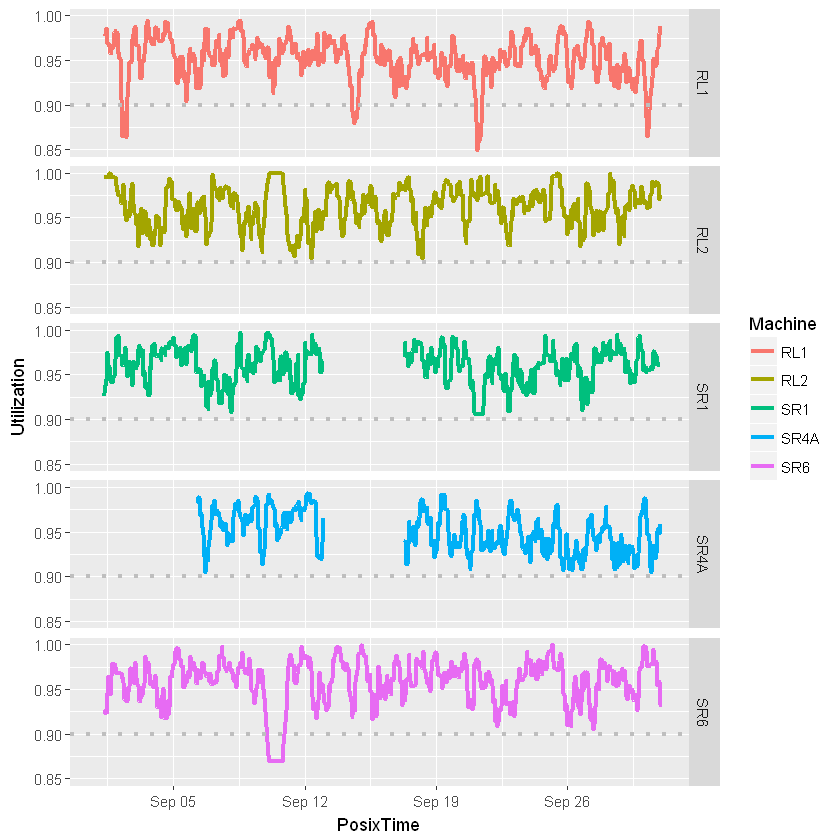

In [64]:
myplot = p + geom_line(aes(x=PosixTime, y=Utilization, colour=Machine), size=1.2) + 
facet_grid(Machine~.) +
geom_hline(yintercept = 0.90, colour="Gray", size=1.2, linetype=3)

# Dotted line shows where machine utilzation dropped below 90%
myplot
list_rl1$Plot = myplot  # You can even add an image to a list

Warning message:
"Removed 155 rows containing missing values (geom_path)."

$Machine
[1] "RL1"

$Stats
[1] 0.8492262 0.9516976 0.9950000

$LowThreshold
[1] TRUE

$UnknownHours
[1] "2016-09-01 00:00:00 EDT" "2016-09-01 01:00:00 EDT"
[3] "2016-09-01 02:00:00 EDT" "2016-09-01 03:00:00 EDT"
[5] "2016-09-01 04:00:00 EDT" "2016-09-01 05:00:00 EDT"
[7] "2016-09-01 06:00:00 EDT"

$Data
              PosixTime Machine Percent.Idle Utilization
1   2016-09-01 00:00:00     RL1           NA          NA
2   2016-09-01 01:00:00     RL1           NA          NA
3   2016-09-01 02:00:00     RL1           NA          NA
4   2016-09-01 03:00:00     RL1           NA          NA
5   2016-09-01 04:00:00     RL1           NA          NA
6   2016-09-01 05:00:00     RL1           NA          NA
7   2016-09-01 06:00:00     RL1           NA          NA
8   2016-09-01 07:00:00     RL1  0.019940476   0.9800595
9   2016-09-01 08:00:00     RL1  0.019970238   0.9800298
10  2016-09-01 09:00:00     RL1  0.021190476   0.9788095
11  2016-09-01 10:00:00     RL1  0.013750000   0.9862500
12  2016-09

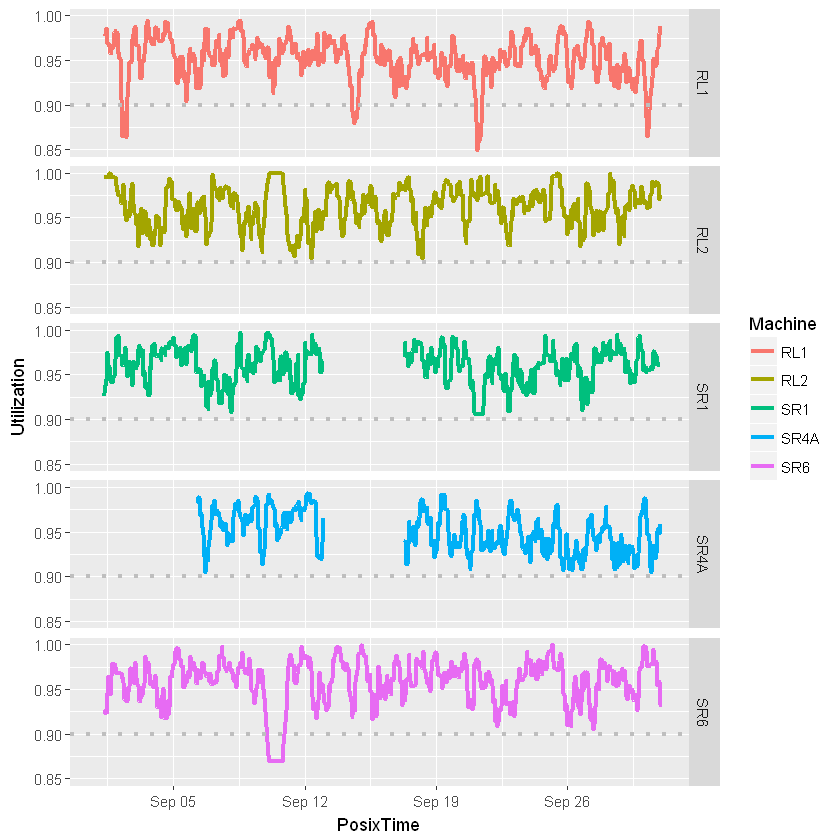

In [65]:
list_rl1

In [66]:

summary(list_rl1)

             Length Class      Mode     
Machine      1      -none-     character
Stats        3      -none-     numeric  
LowThreshold 1      -none-     logical  
UnknownHours 7      POSIXct    numeric  
Data         4      data.frame list     
Plot         9      gg         list     

In [67]:
str(list_rl1)

List of 6
 $ Machine     : chr "RL1"
 $ Stats       : num [1:3] 0.849 0.952 0.995
 $ LowThreshold: logi TRUE
 $ UnknownHours: POSIXct[1:7], format: "2016-09-01 00:00:00" "2016-09-01 01:00:00" ...
 $ Data        :'data.frame':	720 obs. of  4 variables:
  ..$ PosixTime   : POSIXct[1:720], format: "2016-09-01 00:00:00" "2016-09-01 01:00:00" ...
  ..$ Machine     : Factor w/ 1 level "RL1": 1 1 1 1 1 1 1 1 1 1 ...
  ..$ Percent.Idle: num [1:720] NA NA NA NA NA ...
  ..$ Utilization : num [1:720] NA NA NA NA NA ...
 $ Plot        :List of 9
  ..$ data       :'data.frame':	3600 obs. of  4 variables:
  .. ..$ PosixTime   : POSIXct[1:3600], format: "2016-09-01 00:00:00" "2016-09-01 01:00:00" ...
  .. ..$ Machine     : Factor w/ 5 levels "RL1","RL2","SR1",..: 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ Percent.Idle: num [1:3600] NA NA NA NA NA ...
  .. ..$ Utilization : num [1:3600] NA NA NA NA NA ...
  ..$ layers     :List of 2
  .. ..$ :Classes 'LayerInstance', 'Layer', 'ggproto' <ggproto object: Class L